# Influence of different parameters on our DQN


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline
sns.set(style="darkgrid")

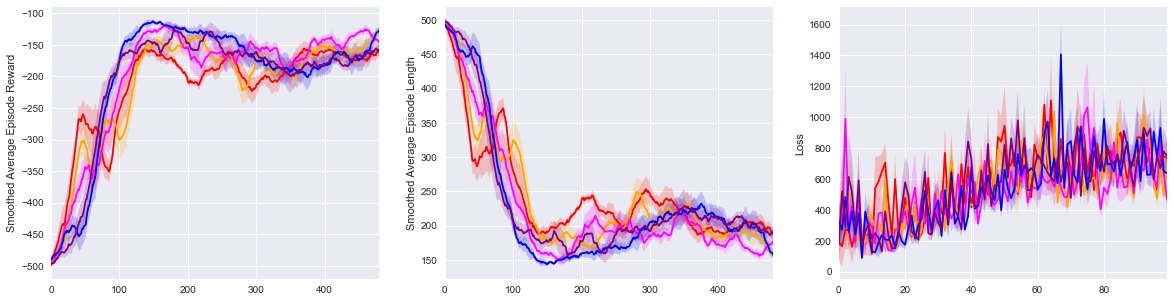

In [4]:
#experiments = [[30], [50], [100],
#               [30, 30],[40, 20], [60, 60],
#               [30, 30, 30], [40, 30, 20]]

num_setups = 5 # highest among the first number in the file name
num_runs = 7 # how many times we repeat the same setup
mean_window = 20

def smoothen(arr, width=mean_window):
    return np.convolve(arr, np.ones((width,)) / width, mode='valid')

smoothed_mean_rewards = np.array([[smoothen(np.load('log/train/{}_train_ERL_{}.npy'.format(exp, run_id)))
                                    for run_id in range(num_runs)] for exp in range(1, num_setups+1)])

smoothed_mean_steps = np.array([[smoothen(np.load('log/train/{}_train_ESL_{}.npy'.format(exp, run_id)))
                                    for run_id in range(num_runs)] for exp in range(1, num_setups+1)])

mean_loss = np.array([[np.load('log/train/{}_train_L_{}.npy'.format(exp, run_id))
                        for run_id in range(num_runs)] for exp in range(1, num_setups+1)])

colors=['red', 'orange', 'magenta', 'blue', 'purple', 'cyan', 'green', 'yellow']
experiments = list(zip(['Smoothed Average Episode Reward',
                        'Smoothed Average Episode Length',
                        'Loss'],   
                       [smoothed_mean_rewards, 
                        smoothed_mean_steps, 
                        mean_loss]))

f, axes = plt.subplots(nrows=1, ncols=len(experiments), figsize=(20,5))
axes = [axes]
for setup in range(num_setups):
    for exp, (name, data) in enumerate(experiments):
        sns.tsplot(data=data[setup,:,:], color=colors[setup], ax=axes[0][exp], value=name)
plt.show()